# Ejercicio 2 

Supongamos que un dado justo se lanza dos veces. Consideremos las siguientes variables aleatorias:

\begin{align*}
	X&=\text{el valor máximo que aparece en los dos lanzamientos}\\
	Y&=\text{el valor mínimo que aparece en los dos lanzamientos}\\
	Z&=\text{la suma de los números que aparecen en los dos lanzamientos}\\
	W&=\text{la resta de los números que aparecen en los dos lanzamientos}
	\end{align*}
    
Encuentra la ley de estas variables aleatorias. Además, encuentra la esperanza y varianza de cada una de ellas.

### Solución

Primero procederemos a emular el comportamiento de un dado justo, para ello proponemos la siguiente función:

In [1]:
import random 

#Se genera un numero aleatorio entre 1 y 6 para simular el dado
def dadoJusto():
    return random.randint(1,6)

Cada llamada a dado justo devuelve un entero entre 1 y 6, de esta manera podemos simular el comportamiento del dado, como el lanzamiento de cada dado es independiente del otro podemos proceder a modelar las variables aleatorias de la siguiente forma:

Definimimos la funcion $\textbf{maxLanzamiento(n)}$ para modelar $X$

In [2]:
from collections import defaultdict

def maxLanzamiento(n):
    frecuencias = defaultdict(int)

    for x in range(n):
        # se tiran ambos dados y se obtiene el maximo
        a =  max(dadoJusto(),dadoJusto())
        frecuencias[a]+=1
        
    frecuencias = sorted(frecuencias.items())
    
    return frecuencias

Notamos que las demas variables se pueden modelar de manera analoga, asi que definimos las funciones $\textbf{minLanzamiento(n)}$, $\textbf{sumaDosLanzamientos(n)}$, $\textbf{restaDosLanzamientos(n)}$, para $Y,Z,W$ respectivamente. Tambien definimos una funcion auxiliar que nos permitira comparar resultados

In [3]:
def minLanzamiento(n):
    frecuencias = defaultdict(int)

    for x in range(n):
        # se tiran ambos dados y se obtiene el minimo
        a =  min(dadoJusto(),dadoJusto())
        frecuencias[a]+=1
        
    frecuencias = sorted(frecuencias.items())
    
    return frecuencias

def sumaDosLanzamientos(n):
    frecuencias = defaultdict(int)

    for x in range(n):
        # se tiran ambos dados y se suman los resultados
        a =  dadoJusto() + dadoJusto()
        frecuencias[a]+=1
        
    frecuencias = sorted(frecuencias.items())
    
    return frecuencias

def restaDosLanzamientos(n):
    frecuencias = defaultdict(int)

    for x in range(n):
        # se tiran ambos dados y se restan los resultados
        a =  dadoJusto() - dadoJusto()
        frecuencias[a]+=1
        
    frecuencias = sorted(frecuencias.items())
    
    return frecuencias

import math

##Funciones auxiliares para presentar los datos
def aux(frecuencias, repeticiones, variable):
    esperanza = 0;
    varianza = 0;
    
    for clave, valor in frecuencias:
        probabilidad = valor/repeticiones
        print("La probabilidad de obtener ", clave , " es: " , probabilidad)
        esperanza += probabilidad*clave;
        varianza +=  (probabilidad * pow(clave,2))
        
    varianza = varianza - pow(esperanza,2)
    print("\nLa esperanza de ",variable," es :",esperanza)
    print("La varianza de ",variable," es :", varianza)
    
def makePlot(frecuencias, c):
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    resultado = [str(i) for i,j in frecuencias]
    frecuencia = [j/n for i,j in frecuencias]
    ax.bar(resultado,frecuencia,color = c)
    plt.title("Frecuencias relativas en "+str(n)+" repeticiones")
    plt.show()
    

En las siguientes celdas procedemos a obtener los datos experimentales para cada variables y contrastarlos con la parte teorica realizada.

### $X$ y la funcion maxLanzamiento(n)

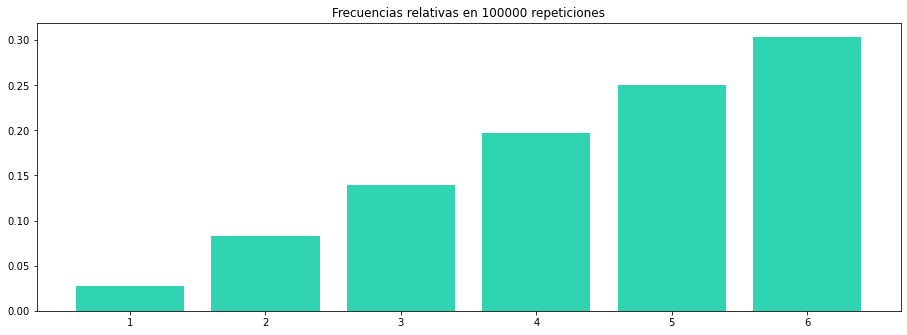

La probabilidad de obtener  1  es:  0.02695
La probabilidad de obtener  2  es:  0.08249
La probabilidad de obtener  3  es:  0.13977
La probabilidad de obtener  4  es:  0.19686
La probabilidad de obtener  5  es:  0.25011
La probabilidad de obtener  6  es:  0.30382

La esperanza de  X  es : 4.47215
La varianza de  X  es : 1.954744377499999


In [4]:
import matplotlib.pyplot as plt

n = 100000
frecuencias = maxLanzamiento(n)
makePlot(frecuencias,'#31d4b1')
aux(frecuencias,n,"X")

Comparamos con nuestros resultados obtenidos de manera teorica para $X$:
$$\begin{array}{cll}             
P(x = 1) = & \frac{1}{36} = & 0.0277\\
P(x = 2) =& \frac{3}{36} = & 0.0833\\
P(x = 3) = & \frac{5}{36} =  & 0.1388 \\
P(x = 4) = & \frac{7}{36} = & 0.1944\\
P(x = 5) = & \frac{9}{36} =  & 0.25 \\
P(x = 6) = & \frac{11}{36} =  & 0.3055 \\
\end{array}$$

Esperanza de $X = \frac{161}{36} = 4.4722..$

Varianza de $X$ = $\frac{2555}{1296} = 1.9714$

### $Y$ y la funcion minLanzamiento(n)

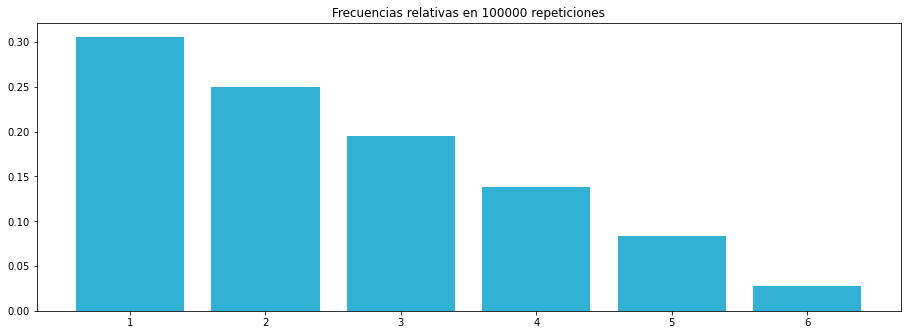

La probabilidad de obtener  1  es:  0.30605
La probabilidad de obtener  2  es:  0.25005
La probabilidad de obtener  3  es:  0.19473
La probabilidad de obtener  4  es:  0.13806
La probabilidad de obtener  5  es:  0.08349
La probabilidad de obtener  6  es:  0.02762

La esperanza de  Y  es : 2.52575
La varianza de  Y  es : 1.9699369375


In [5]:
n = 100000

frecuencias = minLanzamiento(n)
makePlot(frecuencias,'#31b1d4')

aux(frecuencias,n,"Y")

Comparamos con nuestros resultados obtenidos de manera teorica para $Y$:
$$\begin{array}{cll}  
P(y = 1) = & \frac{11}{36} =  & 0.3055 \\
P(y = 2) = & \frac{9}{36} =  & 0.25 \\
P(y = 3) = & \frac{7}{36} = & 0.1944\\
P(y = 4) = & \frac{5}{36} =  & 0.1388 \\
P(y = 5) =& \frac{3}{36} = & 0.0833\\
P(y = 6) = & \frac{1}{36} = & 0.0277
\end{array}$$

Esperanza de $Y = \frac{91}{36} = 2.5277..$

Varianza de $Y$ = $\frac{2555}{1296} = 1.9714$

### $Z$ y la funcion sumaDosLanzamientos(n)

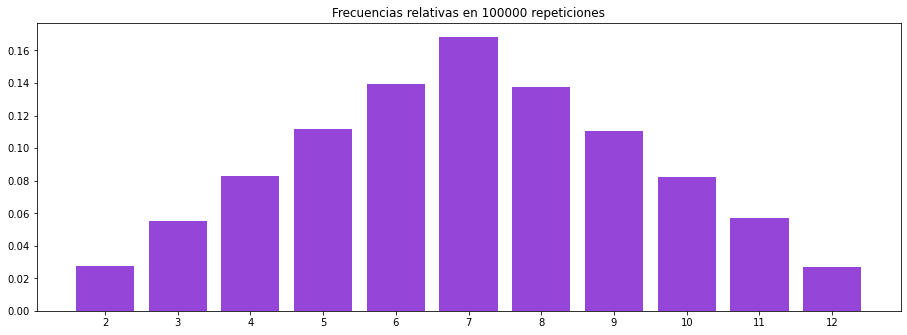

La probabilidad de obtener  2  es:  0.02742
La probabilidad de obtener  3  es:  0.05536
La probabilidad de obtener  4  es:  0.08276
La probabilidad de obtener  5  es:  0.11193
La probabilidad de obtener  6  es:  0.13966
La probabilidad de obtener  7  es:  0.16857
La probabilidad de obtener  8  es:  0.13762
La probabilidad de obtener  9  es:  0.11064
La probabilidad de obtener  10  es:  0.08236
La probabilidad de obtener  11  es:  0.05687
La probabilidad de obtener  12  es:  0.02681

La esperanza de  Z  es : 6.99717
La varianza de  Z  es : 5.805061991100004


In [6]:
n = 100000

frecuencias = sumaDosLanzamientos(n)
makePlot(frecuencias,'#9545d8')

aux(frecuencias,n,"Z")

Comparamos con nuestros resultados obtenidos de manera teorica para $Z$:

$$\begin{array}{cll}  
P(z = 2) = & \frac{1}{36} =  & 0.0277 \\
P(z = 3) = & \frac{2}{36} =  & 0.0555\\
P(z = 4) = & \frac{3}{36} = & 0.0833\\
P(z = 5) = & \frac{4}{36} =  & 0.1111 \\
P(z = 6) = & \frac{5}{36} = & 0.1388\\
P(z = 7) = & \frac{6}{36} = & 0.1666\\
P(z = 8) = & \frac{5}{36} =  & 0.1388 \\
P(z = 9) = & \frac{4}{36} =  & 0.1111\\
P(z = 10) = & \frac{3}{36} = & 0.0833\\
P(z = 11) = & \frac{2}{36} =  & 0.0555 \\
P(z = 12) = & \frac{1}{36} = & 0.0277\\
\end{array}$$

Esperanza de $Z  = 7$

Varianza de $Z$ = $\frac{35}{6} = 5.8333..$

### $W$ y la funcion restaDosLanzamientos(n)

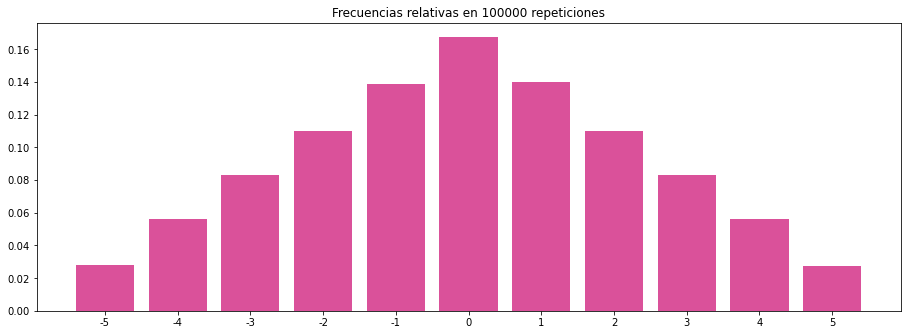

La probabilidad de obtener  -5  es:  0.02787
La probabilidad de obtener  -4  es:  0.05617
La probabilidad de obtener  -3  es:  0.08312
La probabilidad de obtener  -2  es:  0.10979
La probabilidad de obtener  -1  es:  0.13897
La probabilidad de obtener  0  es:  0.16788
La probabilidad de obtener  1  es:  0.13974
La probabilidad de obtener  2  es:  0.10977
La probabilidad de obtener  3  es:  0.08317
La probabilidad de obtener  4  es:  0.05632
La probabilidad de obtener  5  es:  0.0272

La esperanza de  W  es : -0.0018699999999999828
La varianza de  W  es : 5.8301465031


In [7]:
n = 100000

frecuencias = restaDosLanzamientos(n)
makePlot(frecuencias,'#da519a')

aux(frecuencias,n,"W")

Comparamos con nuestros resultados obtenidos de manera teorica para $W$:

$$\begin{array}{cll}  
P(w =-5) = & \frac{1}{36} =  & 0.0277 \\
P(w =-4) = & \frac{2}{36} =  & 0.0555\\
P(w =-3) = & \frac{3}{36} = & 0.0833\\
P(w =-2) = & \frac{4}{36} =  & 0.1111 \\
P(w =-1) = & \frac{5}{36} = & 0.1388\\
P(w = 0) = & \frac{6}{36} = & 0.1666\\
P(w = 1) = & \frac{5}{36} =  & 0.1388 \\
P(w = 2) = & \frac{4}{36} =  & 0.1111\\
P(w = 3) = & \frac{3}{36} = & 0.0833\\
P(w = 4) = & \frac{2}{36} =  & 0.0555 \\
P(w = 5) = & \frac{1}{36} = & 0.0277\\
\end{array}$$

Esperanza de $W  = 0$

Varianza de $W$ = $\frac{35}{6} = 5.8333..$